In [344]:
import io
import json
import unicodedata
import sys
import operator
import string
import math
import re
import time
from collections import defaultdict
from collections import Counter
import pandas as pd
# from PIL import Image

In [345]:
from wordcloud import WordCloud, STOPWORDS

# Load Training Dataset

In [346]:
data = pd.read_csv("twitter_vegan_sent_dataset.csv",encoding='latin1', usecols = ['twit', 'sent'])

In [347]:
data.head()

,sent,twit
0,0,Creepy Outdoor on the speedway: Alli is now in...
1,0,"The nowhere land - not 100% sick, but definate..."
2,0,@Seamonkey86 I am on a healthy eating kick! I ...
3,0,"goood morning sheffield, who the fuck text me ..."
4,0,"Workin the election, driving round checking on..."


# Preprocessing tweets

In [348]:
data['twit'] = [re.sub('@[^\s]+', '', x) for x in data['twit']]
data.head()
df_clean = data
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df_clean['clean'] = df_clean['twit'].astype('str') 
df_clean.dtypes

df_clean["tokens"] = df_clean["clean"].apply(tokenizer.tokenize)

In [312]:
df_clean.head()

,sent,twit,clean,tokens
0,0,Creepy Outdoor on the speedway: Alli is now in...,Creepy Outdoor on the speedway: Alli is now in...,"[Creepy, Outdoor, on, the, speedway, Alli, is,..."
1,0,"The nowhere land - not 100% sick, but definate...","The nowhere land - not 100% sick, but definate...","[The, nowhere, land, not, 100, sick, but, defi..."
2,0,I am on a healthy eating kick! I could only h...,I am on a healthy eating kick! I could only h...,"[I, am, on, a, healthy, eating, kick, I, could..."
3,0,"goood morning sheffield, who the fuck text me ...","goood morning sheffield, who the fuck text me ...","[goood, morning, sheffield, who, the, fuck, te..."
4,0,"Workin the election, driving round checking on...","Workin the election, driving round checking on...","[Workin, the, election, driving, round, checki..."


In [349]:

stop_words = open("stopwords.txt").read().split()

In [350]:
slang = {
"aint": "is not",
"arent": "are not",
"cant": "cannot",
"cantve": "cannot have",
"cause": "because",
"couldve": "could have",
"couldnt": "could not",
"couldntve": "could not have",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hadntve": "had not have",
"hasnt": "has not",
"havent": "have not",
"hed": "he would",
"hedve": "he would have",
"hell": "he will",
"hellve": "he he will have",
"hes": "he is",
"howd": "how did",
"howdy": "how do you",
"howll": "how will",
"hows": "how is",
"Id": "I would",
"Idve": "I would have",
"Ill": "I will",
"Illve": "I will have",
"Im": "I am",
"Ive": "I have",
"id": "i would",
"idve": "i would have",
"ill": "i will",
"illve": "i will have",
"im": "i am",
"ive": "i have",
"isnt": "is not",
"itd": "it would",
"itdve": "it would have",
"itll": "it will",
"itllve": "it will have",
"its": "it is",
"lets": "let us",
"maam": "madam",
"maynt": "may not",
"mightve": "might have",
"mightnt": "might not",
"mightntve": "might not have",
"mustve": "must have",
"mustnt": "must not",
"mustntve": "must not have",
"neednt": "need not",
"needntve": "need not have",
"oclock": "of the clock",
"oughtnt": "ought not",
"oughtntve": "ought not have",
"shant": "shall not",
"shant": "shall not",
"shantve": "shall not have",
"shed": "she would",
"shedve": "she would have",
"shellve": "she will have",
"shes": "she is",
"shouldve": "should have",
"shouldnt": "should not",
"shouldntve": "should not have",
"sove": "so have",
"thatd": "that would",
"thatdve": "that would have",
"thats": "that is",
"thered": "there would",
"theredve": "there would have",
"theres": "there is",
"theyd": "they would",
"theydve": "they would have",
"theyll": "they will",
"theyllve": "they will have",
"theyre": "they are",
"theyve": "they have",
"tove": "to have",
"wasnt": "was not",
"wed": "we would",
"wedve": "we would have",
"wellve": "we will have",
"weve": "we have",
"werent": "were not",
"whatll": "what will",
"whatllve": "what will have",
"whatre": "what are",
"whats": "what is",
"whatve": "what have",
"whens": "when is",
"whenve": "when have",
"whered": "where did",
"wheres": "where is",
"whereve": "where have",
"wholl": "who will",
"whollve": "who will have",
"whos": "who is",
"whove": "who have",
"whys": "why is",
"whyve": "why have",
"willve": "will have",
"wont": "will not",
"wontve": "will not have",
"wouldve": "would have",
"wouldnt": "would not",
"wouldntve": "would not have",
"yall": "you all",
"yalld": "you all would",
"yalldve": "you all would have",
"yallre": "you all are",
"yallve": "you all have",
"youd": "you would",
"youdve": "you would have",
"youll": "you will",
"youllve": "you will have",
"youre": "you are",
"youve": "you have",
"ppl": "people",
"r": "are"
}

In [351]:
for i in range(len(df_clean['tokens'])):
    for j in range(len(df_clean['tokens'][i])):
        df_clean['tokens'][i][j] = df_clean['tokens'][i][j].lower()
        if df_clean['tokens'][i][j] in slang:
            df_clean['tokens'][i][j] = slang[df_clean['tokens'][i][j]]

In [352]:
df_clean['tokens']

0       [creepy, outdoor, on, the, speedway, alli, is,...
1       [the, nowhere, land, not, 100, sick, but, defi...
2       [i, am, on, a, healthy, eating, kick, i, could...
3       [goood, morning, sheffield, who, the, fuck, te...
4       [workin, the, election, driving, round, checki...
                              ...                        
1871    [eat, only, vegetables, and, fruit, you, ll, b...
1872    [has, shiny, healthy, teeth, i, love, dentist,...
1873      [cool, i, m, looking, forward, to, reading, it]
1874    [ara, sã, â, que, ets, tot, un, quot, pirata, ...
1875    [turns, out, the, people, in, aspen, are, tote...
Name: tokens, Length: 1876, dtype: object

In [353]:
import re
for i in df_clean["tokens"]:
    for j in list(i):
        if j in stop_words or len(j)<=2 or re.search(r'\d', j):
            i.remove(j)

In [285]:
df_clean["tokens"]

0       [creepy, outdoor, speedway, alli, portugal, se...
1       [nowhere, land, sick, definately, healthy, eit...
2          [healthy, eating, kick, could, shetland, pony]
3       [goood, morning, sheffield, fuck, text, mornin...
4       [workin, election, driving, round, checking, j...
                              ...                        
1871    [eat, vegetables, fruit, healthy, skinny, brea...
1872    [shiny, healthy, teeth, love, dentist, appoint...
1873                    [cool, looking, forward, reading]
1874    [ara, que, ets, tot, quot, pirata, quot, thepi...
1875    [turns, people, aspen, totes, know, veganism, ...
Name: tokens, Length: 1876, dtype: object

# PMI

In [ ]:
pmi, word_freq = build_pmi(df_clean["tokens"])

In [354]:
def build_frequencies(tweets):
    word_freq = {}
    for tweet in tweets:
        for i in range(len(tweet)):
            if (tweet[i] in word_freq):
                word_freq[tweet[i]] += 1
            else:
                word_freq[tweet[i]] = 1
    word_mtr = defaultdict(lambda : defaultdict(int))

    for tweet in tweets:
        for i in range(len(tweet)):
            for j in range(i):
                w1, w2 = sorted((tweet[i], tweet[j]))
                if w1 != w2:
                    word_mtr[w1][w2] += 1
    return (word_freq, word_mtr)

In [355]:
def build_probabilities(single_freq, mutual_freq, num_tweets):
    p_word = {}
    p_mutual = defaultdict(lambda : defaultdict(int))
    for term1, n in single_freq.items():
        p_word[term1] = n / num_tweets
        for term2 in mutual_freq[term1]:
            p_mutual[term1][term2] = mutual_freq[term1][term2] / num_tweets
    return (p_word, p_mutual)

In [356]:
def build_pmi(tweets):
    word_freq, word_mtr = build_frequencies(tweets)
    p_word, p_mutual = build_probabilities(word_freq, word_mtr, len(tweets))
    pmi = defaultdict(lambda : defaultdict(int))
    
    for term1 in p_word:
        for term2 in word_mtr[term1]:
            denom = p_word[term1] * p_word[term2]
            if (denom < 1e-9):
                pmi[term1][term2] = 0.0
            else:
                pmi[term1][term2] = math.log2(p_mutual[term1][term2] / denom)
    return pmi, word_freq

In [357]:
positive_words = open("positive-words.txt", "r", encoding='latin1').read().split()
negative_words = open("negative-words.txt", "r", encoding='latin1').read().split()

# Semantic Orientation

In [359]:
def get_association(word):
    if (word not in word_freq):
        # print("That word has never been used in this set of tweets! Try another.")
        return 0
    else:
        return (sum(pmi[word][x] for x in positive_words) - sum(pmi[word][x] for x in negative_words)) / word_freq[word]

In [392]:
#training data set
pos_words = {}
neg_words = {}
for j in range(1876):
    for i in df_clean["tokens"][j]:
        value = get_association(i)
        if value > 0:
            pos_words.setdefault(i, []).append(value)
        elif value < 0:
            neg_words.setdefault(i, []).append(value)
   # print(j, end = ' ')

# Accuracy on a training data set

In [361]:
cnt=0; 
total = 0;
for j in range(len(df_clean)):
    if(len(df_clean["tokens"][j]) == 0):
        continue;
    score = 0
    total+=1
    for i in df_clean["tokens"][j]:
        temp = get_association(i)
        score += temp
        # print(temp, len(test_data["ntweet"][j]), i)
       
    score = score / len(df_clean["tokens"][j])
    if(df_clean['sent'][j]==0 and score<0):  cnt+=1
    elif(df_clean['sent'][j]==4 and score>=0): cnt+=1
    
    # if score >= 0:
    #     print("positive", score, df_clean['sent'][j], cnt/(total), j)
    # else: print("negative", score,df_clean['sent'][j], cnt/(total),j)
print(cnt/(total))

0.6149333333333333


In [396]:
#pos, neg from main data set 2010-2022
pos_wordsV = {}
neg_wordsV = {}
for j in range(len(vegan)):
    for i in vegan["tokens"][j]:
        value = get_association(i)
        if value > 0:
            pos_wordsV.setdefault(i, []).append(value)
        elif value < 0:
            neg_wordsV.setdefault(i, []).append(value)

In [148]:
import io
import json
import unicodedata
import sys
import operator
import string
import math
import re
import time
from collections import defaultdict
from collections import Counter
import pandas as pd


# 2010-2022 popular tweets analysis

In [119]:
data2 = pd.read_pickle("vegan_tweets2010-2022_monthly.pkl")
data2.describe()

,Tweet Id,replyCount,retweetCount,likeCount,quoteCount
count,1.136770e+05,113677.000000,113677.000000,113677.000000,113677.000000
mean,7.396452e+17,0.328853,0.528603,3.144655,0.048154
std,4.674333e+17,3.921993,23.023366,344.353841,4.196721
min,7.313936e+09,0.000000,0.000000,0.000000,0.000000
25%,3.290187e+17,0.000000,0.000000,0.000000,0.000000
50%,7.483031e+17,0.000000,0.000000,0.000000,0.000000
75%,1.145107e+18,0.000000,0.000000,1.000000,0.000000
max,1.527700e+18,1119.000000,7492.000000,115499.000000,1398.000000


In [120]:
data2["year"] = data2["Datetime"].apply(lambda x: x.year)

In [121]:
data2['Text'] = [re.sub('@[^\s]+', '', x) for x in data2['Text']]
data2.head()

,Datetime,Tweet Id,Text,Username,Query,replyCount,retweetCount,likeCount,quoteCount,lang,source,retweetedTweet,quotedTweet,mentionedUsers,year
0,2010-01-30 23:59:47+00:00,8430272628,Well help me understand how that relates to b...,IQXS,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/Twinz2],2010
1,2010-01-30 23:58:21+00:00,8430226196,"okay, maybe i'm not making vegan alfredo saude...",desdemona,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010
2,2010-01-30 23:57:14+00:00,8430191199,Via no oil #vegan pesto ~ easy-shmeasy http:/...,itsallgood3sm,vegan,0,0,0,0,en,"<a href=""http://www.cloudhopper.com/"" rel=""nof...",None,None,[https://twitter.com/feelgoodguru],2010
3,2010-01-30 23:56:25+00:00,8430165062,Just had a delicious vegan meal @ Jean's Kitch...,RachelLagroix,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010
4,2010-01-30 23:56:19+00:00,8430161604,says: I like how this BBQ sauce is vegan. Wha...,annesmash,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/secretKGB],2010


In [122]:
vegan = data2
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
vegan['clean'] = vegan['Text'].astype('str') 
vegan.dtypes

vegan["tokens"] = vegan["Text"].apply(tokenizer.tokenize)

In [123]:
vegan['tokens']

0         [Well, help, me, understand, how, that, relate...
1         [okay, maybe, i, m, not, making, vegan, alfred...
2         [Via, no, oil, vegan, pesto, easy, shmeasy, ht...
3         [Just, had, a, delicious, vegan, meal, Jean, s...
4         [says, I, like, how, this, BBQ, sauce, is, veg...
                                ...                        
113672                                              [༥, ｽﾔ]
113673                                     [ついうっかり, お疲れ様です]
113674                                         [お前誰だよ, キモい]
113675    [Wie, werden, die, aus, Tofu, hergestellt, Gem...
113676    [My, sister, will, have, her, battered, tofu, ...
Name: tokens, Length: 113677, dtype: object

In [124]:
for i in range(len(vegan)):
    for j in range(len(vegan['tokens'][i])):
        vegan['tokens'][i][j] = vegan['tokens'][i][j].lower()
        if vegan['tokens'][i][j] in slang:
            vegan['tokens'][i][j] = slang[vegan['tokens'][i][j]]

In [125]:
for i in vegan["tokens"]:
    for j in list(i):
        if j in stop_words or len(j)<=2 or re.search(r'\d', j):
            i.remove(j)

In [126]:
vegan["tokens"].head()

0    [well, help, understand, relates, vegan, serious]
1    [okay, maybe, making, vegan, alfredo, saude, n...
2    [oil, vegan, pesto, easy, shmeasy, http, feelg...
3    [delicious, vegan, meal, jean, kitchen, danforth]
4    [says, like, bbq, sauce, vegan, going, bbq, fr...
Name: tokens, dtype: object

# Sentiment Analysis of popular tweets

In [398]:
cnt=0;
pos = 0.0
neg =0.0
nt = 0.0
ye = 2010;

for j in range(len(vegan)):
    #ignore tweets with no retweets
    if vegan['retweetCount'][j] < 1: continue 
    if ye != vegan['year'][j]:
        if cnt != 0:
            print("POSITIVE "+ str(ye) + "     " + str(pos/cnt) + '           ' + str(pos))
            print("NEGATIVE "+ str(ye) + "     " + str(neg/cnt) + '           ' + str(neg))
            print("NEUTRAL "+ str(ye) + "     " + str(nt/cnt) + '           ' + str(nt))
            print(cnt)
        cnt = 0
        pos = 0.0
        neg = 0.0
        nt = 0.0
        ye +=1
    score = 0
    for i in vegan["tokens"][j]:
        temp = get_association(i)
        score += temp
    if len(vegan["tokens"][j]) == 0:
        continue;
    score = score / len(vegan["tokens"][j])
    cnt +=1
    if(score >=-0.1 and score <=0.1): 
        nt +=1
       
    elif score >= 0:
        pos +=1
        
    else: 
        neg+=1
        
    #print(str(score) + ' ' +str(vegan['Text'][j]))
   
    #for diffusion
    if (vegan['retweetCount'][j] >=200):
        #print(str(score) + '  retweet' +str(vegan['retweetCount'][j]))
        # print(str(score) + ' ' +str(vegan['Text'][j]))
        x = np.append(x, score)
        y = np.append(y,vegan['retweetCount'][j] )
        
print("POSITIVE "+ str(ye) + " " + str(pos/cnt) + " " +str(pos))       
print("NEGATIVE "+ str(ye) + " " + str(neg/cnt) +" "+ str(neg))
print("NEUTRAL "+ str(ye) + "     " + str(nt/cnt) + '           ' + str(nt))
print(cnt)


POSITIVE 2010     0.4830917874396135           200.0
NEGATIVE 2010     0.34299516908212563           142.0
NEUTRAL 2010     0.17391304347826086           72.0
414
POSITIVE 2011     0.4833948339483395           262.0
NEGATIVE 2011     0.3007380073800738           163.0
NEUTRAL 2011     0.2158671586715867           117.0
542
POSITIVE 2012     0.43221476510067114           322.0
NEGATIVE 2012     0.3167785234899329           236.0
NEUTRAL 2012     0.25100671140939596           187.0
745
POSITIVE 2013     0.4778856526429342           443.0
NEGATIVE 2013     0.313915857605178           291.0
NEUTRAL 2013     0.20819848975188782           193.0
927
POSITIVE 2014     0.3960474308300395           501.0
NEGATIVE 2014     0.30355731225296445           384.0
NEUTRAL 2014     0.30039525691699603           380.0
1265
POSITIVE 2015     0.42025518341307816           527.0
NEGATIVE 2015     0.2902711323763955           364.0
NEUTRAL 2015     0.2894736842105263           363.0
1254
POSITIVE 2016     0.

# Diffusion Hypothesis test

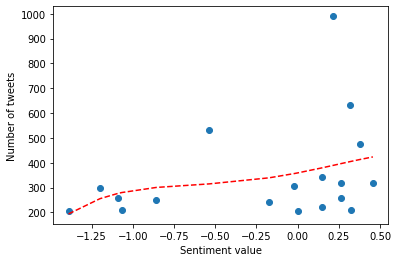

In [391]:
# Here I sort x values and y values
#here we count only tweets having more than 200 retweets 
args = np.argsort(x)
x = x[args]
y = y[args]

plt.scatter(x, y) 

fit = np.polyfit(x, y, deg=4) 
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.xlabel("Sentiment value")
plt.ylabel("Number of tweets")
plt.show()

In [389]:
import matplotlib.pyplot as plt 
import numpy as np
x=np.array([])
y = np.array([])